In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
from datetime import datetime
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3

In [2]:
wpre = pd.read_csv('winslotspre.txt', delimiter="|")
wpos = pd.read_csv('winslotspost.txt', delimiter="|")
epre = pd.read_csv('elslotspre.txt', delimiter="|")
epos = pd.read_csv('elslotspost.txt', delimiter="|")
len(wpre), len(wpos), len(epre), len(epos)

(5995, 4402, 13937, 9232)

In [7]:
wtot = pd.concat([wpre, wpos])
etot = pd.concat([epre, epos])

In [8]:
etot['slot'].values.min(), etot['slot'].values.max()

(5992187, 6034959)

In [10]:
minslot = etot['slot'].values.min()
maxslot = etot['slot'].values.max()

In [12]:
hourly_bounds = np.arange(minslot, maxslot, 300)
hourly_bounds, len(hourly_bounds)

(array([5992187, 5992487, 5992787, 5993087, 5993387, 5993687, 5993987,
        5994287, 5994587, 5994887, 5995187, 5995487, 5995787, 5996087,
        5996387, 5996687, 5996987, 5997287, 5997587, 5997887, 5998187,
        5998487, 5998787, 5999087, 5999387, 5999687, 5999987, 6000287,
        6000587, 6000887, 6001187, 6001487, 6001787, 6002087, 6002387,
        6002687, 6002987, 6003287, 6003587, 6003887, 6004187, 6004487,
        6004787, 6005087, 6005387, 6005687, 6005987, 6006287, 6006587,
        6006887, 6007187, 6007487, 6007787, 6008087, 6008387, 6008687,
        6008987, 6009287, 6009587, 6009887, 6010187, 6010487, 6010787,
        6011087, 6011387, 6011687, 6011987, 6012287, 6012587, 6012887,
        6013187, 6013487, 6013787, 6014087, 6014387, 6014687, 6014987,
        6015287, 6015587, 6015887, 6016187, 6016487, 6016787, 6017087,
        6017387, 6017687, 6017987, 6018287, 6018587, 6018887, 6019187,
        6019487, 6019787, 6020087, 6020387, 6020687, 6020987, 6021287,
      

In [45]:
hourly_bounds[90], hourly_bounds[91]

(6019187, 6019487)

In [25]:
els = []
wns = []
for i in range(len(hourly_bounds)-1):
# for i in range(1):
    lb, ub = hourly_bounds[i], hourly_bounds[i+1]
    el = etot[etot['slot'] >= lb]
    el = el[el['slot'] < ub]
    wn = wtot[wtot['slot'] >= lb]
    wn = wn[wn['slot'] < ub]
#     print(len(el), len(wn))
    els.append(len(el))
    wns.append(len(wn))

In [22]:
len(els), len(wns), len(hourly_bounds)

(142, 142, 143)

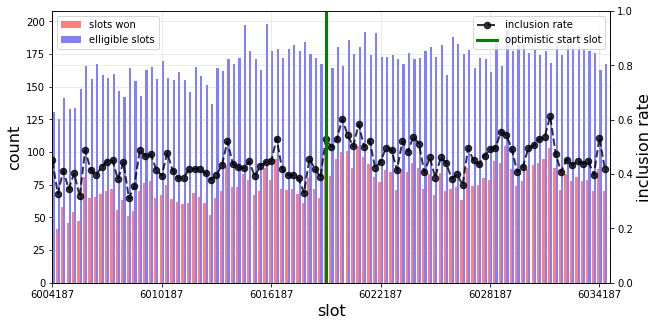

In [51]:
f, ax = plt.subplots(figsize=(10,5))


ax.bar(np.arange(len(hourly_bounds[:-1]))-.2, wns, width=0.4, color='r', alpha=0.5, label='slots won')
ax.bar(np.arange(len(hourly_bounds[:-1]))+.2, els, width=0.4, color='b', alpha=0.5, label='elligible slots')

ax.set_xlabel('slot', size=16)
ax.set_ylabel('count', size=16)

ax2 = ax.twinx()
ax2.plot(np.arange(len(hourly_bounds[:-1])), np.asarray(wns) / np.asarray(els), 'k.--', linewidth=2, alpha=0.8, label='inclusion rate', markersize=13)
ax2.set_ylim(0, 1)
ax2.set_ylabel('inclusion rate', size=16)
ax.set_xticks(np.arange(0,160,20))
ax.set_xticklabels(hourly_bounds[np.arange(0,160,20)])
# ax.set_title('30 day inclusion rate')
ax2.axvline(90, color='g', linewidth=3, label='optimistic start slot')
ax.legend()
ax.set_xlim(40, len(hourly_bounds[:-1]))
ax2.legend()
plt.show()

In [53]:
ir = np.asarray(wns) / np.asarray(els)
ir[:91].mean(), ir[91:].mean()

(0.4315038356576017, 0.4764047546927929)

In [55]:
builders = pd.read_csv('../big/builders.txt', delimiter="|")
descriptions = builders[['substring', 'builder_id']].copy()
descriptions.head()

,substring,builder_id
0,0xaec4ec,beaverbuild
1,0x96a59d,beaverbuild
2,0xb5d883,beaverbuild
3,0x8dde59,beaverbuild
4,0x8c344f,bob


In [66]:
wnstot = pd.read_csv('winslots.txt', delimiter="|")
wnstot.head()

,slot,inserted_at,substring
0,5992187,2023-03-1317:57:47.83015,0x8bc8d1
1,5992188,2023-03-1317:57:59.841436,0x81babe
2,5992190,2023-03-1317:58:24.432114,0xb5d883
3,5992191,2023-03-1317:58:35.545284,0xb5d883
4,5992195,2023-03-1317:59:23.672094,0xa1dead


In [67]:
wnstot_pubkey = wnstot.merge(descriptions, how='left', on='substring').dropna()
wnstot_pubkey.head()

,slot,inserted_at,substring,builder_id
2,5992190,2023-03-1317:58:24.432114,0xb5d883,beaverbuild
3,5992191,2023-03-1317:58:35.545284,0xb5d883,beaverbuild
5,5992196,2023-03-1317:59:35.434204,0xa4fb63,builder0x69
7,5992214,2023-03-1318:03:11.477094,0x82ba7c,BuildAI
8,5992218,2023-03-1318:04:00.297403,0x978a35,rsync


In [63]:
els = []
wns = []
for i in range(len(hourly_bounds)-1):
# for i in range(1):
    lb, ub = hourly_bounds[i], hourly_bounds[i+1]
    el = etot[etot['slot'] >= lb]
    el = el[el['slot'] < ub]
    wn = wnstot_pubkey[wnstot_pubkey['slot'] >= lb]
    wn = wn[wn['slot'] < ub]
#     print(len(el), len(wn))
    els.append(len(el))
    wns.append(len(wn))

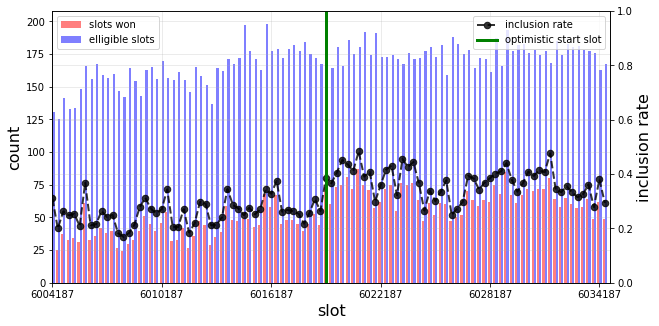

In [64]:
f, ax = plt.subplots(figsize=(10,5))


ax.bar(np.arange(len(hourly_bounds[:-1]))-.2, wns, width=0.4, color='r', alpha=0.5, label='slots won')
ax.bar(np.arange(len(hourly_bounds[:-1]))+.2, els, width=0.4, color='b', alpha=0.5, label='elligible slots')

ax.set_xlabel('slot', size=16)
ax.set_ylabel('count', size=16)

ax2 = ax.twinx()
ax2.plot(np.arange(len(hourly_bounds[:-1])), np.asarray(wns) / np.asarray(els), 'k.--', linewidth=2, alpha=0.8, label='inclusion rate', markersize=13)
ax2.set_ylim(0, 1)
ax2.set_ylabel('inclusion rate', size=16)
ax.set_xticks(np.arange(0,160,20))
ax.set_xticklabels(hourly_bounds[np.arange(0,160,20)])
# ax.set_title('30 day inclusion rate')
ax2.axvline(90, color='g', linewidth=3, label='optimistic start slot')
ax.legend()
ax.set_xlim(40, len(hourly_bounds[:-1]))
ax2.legend()
plt.show()

In [65]:
ir = np.asarray(wns) / np.asarray(els)
ir[:91].mean(), ir[91:].mean()

(0.27065291379608336, 0.3712543916912864)

In [70]:
wnstot_pubkey['inserted_at'] = pd.to_datetime(wnstot_pubkey['inserted_at'], format="%Y-%m-%d%H:%M:%S.%f")
wnstot_pubkey['hour'] = np.asarray([pd.Timestamp(x).round(freq='1H') for x in wnstot_pubkey['inserted_at'].values])
wnstot_pubkey['hour']

2       2023-03-13 18:00:00
3       2023-03-13 18:00:00
5       2023-03-13 18:00:00
7       2023-03-13 18:00:00
8       2023-03-13 18:00:00
                ...        
10426   2023-03-19 17:00:00
10428   2023-03-19 17:00:00
10429   2023-03-19 17:00:00
10431   2023-03-19 17:00:00
10432   2023-03-19 17:00:00
Name: hour, Length: 7209, dtype: datetime64[ns]

In [87]:
hours = list(set(wnstot_pubkey['hour'].values))
hours.sort()

In [93]:
hours[90]

numpy.datetime64('2023-03-17T12:00:00.000000000')

In [88]:
counts = []
for h in hours:
    hourly = wnstot_pubkey[wnstot_pubkey['hour']==h]
    counts.append(len(hourly))
counts = np.asarray(counts)

In [89]:
counts

array([18, 37, 52, 41, 53, 58, 43, 50, 39, 49, 50, 34, 45, 41, 45, 42, 50,
       40, 34, 43, 48, 47, 54, 32, 42, 47, 39, 36, 43, 41, 29, 34, 20, 44,
       44, 33, 32, 31, 39, 34, 37, 31, 38, 29, 38, 23, 52, 50, 28, 45, 39,
       41, 28, 26, 30, 33, 31, 50, 48, 35, 55, 43, 44, 28, 39, 39, 29, 39,
       44, 44, 24, 40, 54, 50, 46, 45, 50, 47, 37, 67, 61, 63, 60, 46, 45,
       48, 39, 48, 47, 47, 56, 63, 76, 72, 72, 83, 81, 79, 68, 73, 53, 68,
       75, 68, 61, 74, 82, 68, 53, 55, 58, 47, 67, 55, 46, 48, 65, 74, 49,
       63, 64, 66, 77, 72, 75, 66, 64, 67, 81, 68, 69, 68, 79, 62, 65, 53,
       62, 60, 63, 52, 59, 53, 56, 23])

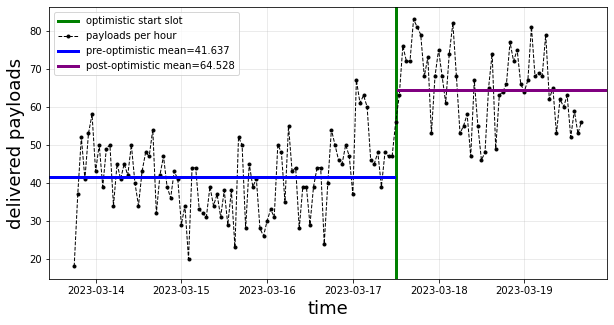

In [111]:
f, ax = plt.subplots(figsize=(10,5))
ax.axvline(hours[90],color='g', linewidth=3, label='optimistic start slot')
ax.plot(hours[:-1], counts[:-1], 'k.--', linewidth=1, label="payloads per hour")
ax.axhline(y=np.mean(counts[:91]), xmin=0,xmax=89/len(hours), color='b', linewidth=3, label='pre-optimistic mean={:0.3f}'.format(np.mean(counts[:91])))
ax.axhline(y=np.mean(counts[91:]), xmin=90/len(hours),xmax=1, color='purple', linewidth=3, label='post-optimistic mean={:0.3f}'.format(np.mean(counts[91:])))
ax.legend()
ax.set_xlabel("time", size=18)
ax.set_ylabel("delivered payloads", size=18)
plt.show()

In [102]:
np.mean(counts[:91]),np.mean(counts[91:]),

(41.637362637362635, 64.52830188679245)